# Part 3: Cancer

In this part of the assignment, you will build a predictive model to classify a given breast tumor as cancer or not based on exam measurements of the size and shape of the tumor. 

**Learning objectives.** You will:
1. Train and test a logistic regression model for binary classification. 
2. Evaluate and interpret a range of metrics including the confusion matrix, precision, recall, and ROC curve.
3. Look for evidence of overfitting and perform hyperparameter selection to choose a regularization weight on a validation set to mitigate overfitting.
4. Fit and discuss an interpretable shallow decision tree model.

The following code will download all of the data, print the feature names, and preview one example. The target value is binary: either `1` or `0` depending on whether the tumor is malignant or benign.

The code stores the feature matrix `X` as a two-dimensional NumPy array where each row corresponds to a data point and each column is a feature. The target value is stored as a one-dimensional NumPy array `y` where the index `i` element of `y` correpsonds to the row `i` data point of `X`.

Your overall goal in this part is to build and evaluate a logistic model to predict the target variable `y` as a function of the ten features in `X` by predicting the probability that a given tumor is malignant.

In [1]:
# Run but DO NOT MODIFY this code

from sklearn.datasets import load_breast_cancer

# Load the diabetes dataset
cancer = load_breast_cancer()
print(cancer.feature_names)

# Get the feature data and target variable
X = cancer.data
y = cancer.target

# Preview the first data point
print(X[0])
print(y[0])

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
 1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
 6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
 1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
 4.601e-01 1.189e-01]
0


## Task 1

Randomly split the input data into a [train and test partition](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html), with at least 30% of the data reserved for testing. Use a random seed of `2024` for reproducibility of the results. 

In [2]:
import numpy as np
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=2024)

## Task 2

Build and evaluate a baseline model as follows. Calculate the proportion of the training data with target `1`, call this proportion `p`. For each example in the test data, randomly predict `1` with probability `p` and `0` otherwise. Set a random seed of `2024` before starting for reproducibility.

Compute and visualize the [confusion matrix](https://scikit-learn.org/stable/auto_examples/miscellaneous/plot_display_object_visualization.html#create-confusionmatrixdisplay) of the resulting predictions on the test data. Also compute and report the [precision](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html) and [recall](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html) of the predictions on the test data. 

Briefly interpret the confusion matrix, precision, and recall. What do these quantities mean in the context of the predictive task?

Precision: 0.97
Recall: 0.95


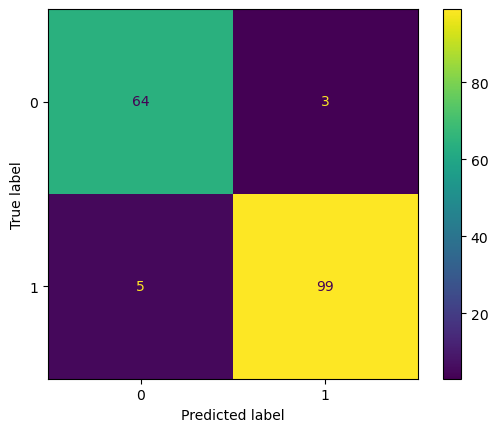

In [3]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=5000)
model.fit(X_train, y_train)
test_probs = model.predict_proba(X_test)

from sklearn.metrics import accuracy_score as acc
train_pred =  model.predict(X_train)
test_pred = model.predict(X_test)

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)
print(f'Precision: {precision_score(y_test, test_pred):.2f}')
print(f'Recall: {recall_score(y_test, test_pred):.2f}')

## Task 3

Randomly split the *training* data into a *train* and *validation* set; similar to how you [randomly split the original dataset](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html), with 30% of the training data (equals 70% times 30% = 21% of the overall data) reserved for the validation set. Use a random seed of `2024` for reproducibility of the results.

Build a [logistic regression model](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#logisticregression) on the train set with the parameter setting `penalty = 'None'` (this will train a basic model without applying any regularization). 

Evaluate the [accuracy](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html) of your model on both (a) the train set, and (b) the validation set. Report your results and briefly explain whether you find evidence of *overfitting*, along with a brief description of what that means. 

If you do find evidence of overfitting, retrain the model (potentially multiple times) to reduce the overfitting by changing the `penalty` parameter to `l2` (this is the default) and trying different values of the `C` hyperparameter that controls the strength of regularization. Show your work and explain in English how you decided on a good setting of the hyperparameter `C` controlling the degree of regularization. 

You should conclude this task by reporting a final model that achieves comparable accuracy on the train set as the unregularized model and that mitigates any evidence of overfitting (it may not be possible to achieve a validation error that is no greater than the train error, but you should reduce the gap).

In [4]:
x_train2, x_validate, y_train2, y_validate = train_test_split(
    X_train, y_train, test_size=0.30, random_state=2024)


model2 = LogisticRegression(penalty='l2', max_iter= 50000, solver='liblinear', C=1
                           )
model2.fit(x_train2, y_train2)
training_probs = model2.predict_proba(x_train2)
validate_probs = model2.predict_proba(x_validate)

train2_pred =  model2.predict(x_train2)
validate_pred = model2.predict(x_validate)

train_accuracy = acc(y_train2, train2_pred)
validate_accuracy = acc(y_validate, validate_pred)

print(f'Training Accuracy: {train_accuracy:.2f}')
print(f'Validation Accuracy: {validate_accuracy:.2f}')

Training Accuracy: 0.98
Validation Accuracy: 0.93


Test 1 with penalty equal to none 
reported:
Training Accuracy: 1.00
Validation Accuracy: 0.94


Test 2 with penalty equal to l2
reported:
Training Accuracy: 0.98
Validation Accuracy: 0.93


Test3 with penalty equal to l1
reported:
Training Accuracy: 0.98
Validation Accuracy: 0.93



Test 4 with penalty equal to elasticnet
reported (results same for all l1 ratio):
Training Accuracy: 0.94
Validation Accuracy: 0.91


C value changes:
c= 0->1: c 0.96-0.98 for training accuracy and 0.91-0.93 for validation

c= 1: 0.98 for training accuracy and 0.93 for validation

c= 2: .97 for training accuracy and 0.93 for validation

End: 0.98 for training accuracy and 0.93 for validation


There was significant evidence of overfitting when the penalty was equal to none because the model returned the exact values from the training data resulting in a training accuracy of 100% while the validation accuracy was signifigantly worse. 

When we use the l2 penalties and look at the results from various hyperparameters, it appears best to use the l2 penalty and to set the c value equal to 1 this is because c=1 provided the same training and validation accuracy as much stronger penalties while also reducing the neccessary strenth of penalty. This penalty reduced the evidence of overfitting from not having a penalty by improving the training to validation accuracy gap from 9% to 5% and it retained comparable training accuracy reporting at 98%.


## Task 4

For the final model you trained in task 3, compute and visualize the [confusion matrix](https://scikit-learn.org/stable/auto_examples/miscellaneous/plot_display_object_visualization.html#create-confusionmatrixdisplay) of the resulting predictions on the test data. Also compute and report the [precision](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html) and [recall](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html) of the predictions on the test data. 

Based on your results, briefly describe how the resulting model is an improvement over the baseline from task 2, interpreting the reported metrics in the context of the predictive task.

In [5]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(model, x_test, y_test)
print(f'Precision: {precision_score(y_test, test_pred):.2f}')
print(f'Recall: {recall_score(y_test, test_pred):.2f}')

NameError: name 'x_test' is not defined

The final model's precision and recall are not significantly better than those of the baseline model. Precision indicates the proportion of true positives among all predicted positives, while recall measures the proportion of true positives among all actual positives. Stagnancy in these metrics suggest that neither model appears better at correctly identifying malignant tumors and reducing false positives and false negatives compared to one another since our method of optimal hyperparameter control in the end nearly matched the default values of the baseline as well as the results that come from testing.

## Task 5

For the predictions of your final model trained in task 3, compute and visualize the [Receiver Operator Characteristic (ROC) Curve](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.RocCurveDisplay.html#roccurvedisplay). Note that you need to use the *probability predictions* of the model, *not* the absolute 0/1 predictions, in order to correctly plot the ROC curve.

Briefly interpret the ROC curve. In particular, what change(s) in the model account for the different possible false positive rates and true positive rates represented on the curve? In the context of a cancer detection task, why might one prefer to select a point on the curve other than the default (represented by your previous results in task 4)?

In [ ]:
validate_probs_positive = validate_probs[:, 1]


fpr, tpr, thresholds = metrics.roc_curve(y_validate, validate_probs_positive)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='Logistic Regression')
display.plot()
plt.show()

One may choose to select a point of the ROC curve as opposed to the default values as the ROC curve represent performance across various threshold values and by visualizing the performance at theese values we may be able to identify a change in value from the default which would improve our performance relative to the task if cancer detection. For example we may want our algorithim to err on the side of additional false positives if it improves the true positive rate as not flagging cancer for detection and leaving it untreated has worse consequences than flagging a sample for additional inspection that winds up being harmless. while this model may be less accurate on some standards as opposed to the default for this specific task it could end up saving lives by being less accurate as a whole.For example we could have a 100% true positive rate if we are willing to have a 30% false positive rate. While this would create additional work for doctors who may have to review samples by hand it would result in 0 cancer cases missed which ultimately seems more valuable.

## Task 6

In practice, it can be very helpful to under **why** a predictive model made a particular prediction. *Interpretable* models have the property that a human can understand this aspect. One example of an interpretable model is the *decision tree*, especially a *shallow* decision tree.

Build three [decision tree classifiers](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier), one for each setting of the `max_depth` hyperparameter to `3`, `5`, and `7`. Fit each model on the train set from task 3, and evaluate the [accuracy](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html), [precision](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html) and [recall](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html) of each model on the validation set (also from task 3). 

Report all of these validation measures for each model corresponding to different settings of `max_depth`, and select one as your final model. Briefly explain why you would select that model for this task. Compute and visualize the [confusion matrix](https://scikit-learn.org/stable/auto_examples/miscellaneous/plot_display_object_visualization.html#create-confusionmatrixdisplay) of your final decision tree model.

In [ ]:
# Write code for task 6 here

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay
import numpy as np

max_depths = [3, 5, 7]
results = []

for max_depth in max_depths:
    dt_model = DecisionTreeClassifier(max_depth=max_depth, random_state=2024)
    dt_model.fit(X_train_final, y_train_final)
    
    y_val_pred = dt_model.predict(X_val)
    
    accuracy = accuracy_score(y_val, y_val_pred)
    precision = precision_score(y_val, y_val_pred, average='weighted')  
    recall = recall_score(y_val, y_val_pred, average='weighted')
    
    results.append({
        'max_depth': max_depth,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall
    })

for result in results:
    print(f"Max Depth: {result['max_depth']}, "
          f"Accuracy: {result['accuracy']:.4f}, "
          f"Precision: {result['precision']:.4f}, "
          f"Recall: {result['recall']:.4f}")

best_model = max(results, key=lambda x: x['accuracy'])
print(f"Selected model: Max Depth {best_model['max_depth']} with Accuracy {best_model['accuracy']:.4f}")

final_model = DecisionTreeClassifier(max_depth=best_model['max_depth'], random_state=2024)
final_model.fit(X_train_final, y_train_final)

y_val_pred_final = final_model.predict(X_val)
cm = confusion_matrix(y_val, y_val_pred_final)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()



As shown in the output, we would select the model with max depth 3 because this model achieves the highest accuracy.